## CIFAR-10 Classification Practice

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10,000 test images.  They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

For a more complete description of the dataset, please see the following:

    https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

#### Reading data

In [95]:
import pandas as pd
import numpy as np
import cPickle

import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
#Define a function to load each batch as dictionary:

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [97]:
batch1 = unpickle('data/data_batch_1')
batch2 = unpickle('data/data_batch_2')
batch3 = unpickle('data/data_batch_3')
batch4 = unpickle('data/data_batch_4')
batch5 = unpickle('data/data_batch_5')
batch_test = unpickle('data/test_batch')

In [98]:
#Define a function to convert this dictionary into dataframe with image pixel array and labels:

def get_dataframe(batch):
    df = pd.DataFrame(batch['data'])
    df['image'] = df.as_matrix().tolist()
    df.drop(range(3072),axis=1,inplace=True)
    df['label'] = batch['labels']
    return df

In [99]:
train = pd.concat([get_dataframe(batch1),get_dataframe(batch2),get_dataframe(batch3),get_dataframe(batch4),get_dataframe(batch5)],ignore_index=True)
test = get_dataframe(batch_test)

#### Quick View 

In [100]:
train.head()

,image,label
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",6
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",9
2,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",9
3,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",4
4,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",1


In [101]:
test.head()

,image,label
0,"[158, 159, 165, 166, 160, 156, 162, 159, 158, ...",3
1,"[235, 231, 232, 232, 232, 232, 232, 232, 232, ...",8
2,"[158, 158, 139, 132, 166, 182, 187, 193, 199, ...",8
3,"[155, 167, 176, 190, 177, 166, 168, 166, 170, ...",0
4,"[65, 70, 48, 30, 23, 40, 44, 45, 45, 40, 10, 1...",6


In [102]:
# for the first 2 rows, the length of the values in the image column

print len(train.image[1])
print len(train.image[2])

3072
3072


In [103]:
# inefficient, but checks to see if each image has any missing pixels

# for i in train.image:
#     if len(train.image[i]) != 3072:
#         print len(train.image[i])

#### Converting images from lists to arrays, matrices

In [116]:
images = []

for i in train.image:
    i = np.asarray(i)
    i = i.reshape((32,32,3), order='F')
    images.append(i)

As the dataset consists of 32x32 images, the length of each image (as an array of numbers) is 3072 (32x32x3)

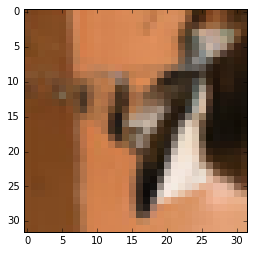

In [125]:
plt.imshow(np.transpose(images[8], (0, 1, 2)), interpolation='nearest')

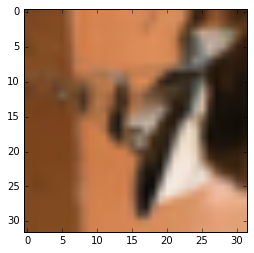

In [128]:


plt.imshow(images[8])

In [ ]:
'''
img_1 = train.image[0]
img_1

len(img_1)

img_arr = np.asarray(img_1)
img_arr.shape

arr_3d = img_arr.reshape((32,32,3), order='F')

print arr_3d.shape

plt.imshow(np.transpose(arr_3d, (0, 1, 2)), interpolation='nearest')


'''

In [79]:
# img_1_re = np.reshape(img_1, (32,32,3), order='F')
# img_1_re = img_1.reshape(3,32,32).transpose(1,2,0)
# lmsValues = img_1.reshape((-1, 3), order='F')

# arr_3d = img_arr.reshape((32,32,3), order='F').transpose(0, 1, 2)
arr_3d = img_arr.reshape((32,32,3), order='F')

#### X, y variables